In [1]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [3]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=None)
xgc = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=6)
cbc = CatBoostClassifier(iterations=30,
                           learning_rate=0.1,
                           depth=6,
                           l2_leaf_reg=3,
                           loss_function='MultiClass',
                           eval_metric='Accuracy')
param = {'num_leaves': 31, 'objective': 'multiclass','num_class':4}
param['metric'] = 'auc_mu'
num_round=10


le = LabelEncoder()

In [4]:
X = pd.read_csv("data.csv",index_col=0)
Y = pd.read_csv("labels.csv",index_col=0)
Y['encoded_labels']=le.fit_transform(Y['disease_type'])

normalized_X = X.div(X.sum(axis=1), axis=0)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [5]:
rfc.fit(X_train,Y_train['disease_type'])

RandomForestClassifier()

In [6]:
rfc_y_pred=rfc.predict(X_test)

In [7]:
acc=accuracy_score(Y_test['disease_type'],rfc_y_pred)
acc

0.9813084112149533

In [8]:
xgc.fit(X_train,Y_train['encoded_labels'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [9]:
xgc_y_pred=xgc.predict(X_test)

In [10]:
acc=accuracy_score(Y_test['encoded_labels'],xgc_y_pred)
acc

0.9906542056074766

In [11]:
cbc.fit(X_train,Y_train['encoded_labels'])

0:	learn: 0.7540323	total: 301ms	remaining: 8.73s
1:	learn: 0.8185484	total: 419ms	remaining: 5.86s
2:	learn: 0.8145161	total: 554ms	remaining: 4.98s
3:	learn: 0.8669355	total: 676ms	remaining: 4.39s
4:	learn: 0.8790323	total: 852ms	remaining: 4.26s
5:	learn: 0.9032258	total: 976ms	remaining: 3.9s
6:	learn: 0.9274194	total: 1.1s	remaining: 3.62s
7:	learn: 0.9314516	total: 1.21s	remaining: 3.33s
8:	learn: 0.9274194	total: 1.33s	remaining: 3.1s
9:	learn: 0.9354839	total: 1.45s	remaining: 2.9s
10:	learn: 0.9596774	total: 1.58s	remaining: 2.72s
11:	learn: 0.9758065	total: 1.72s	remaining: 2.58s
12:	learn: 0.9758065	total: 1.85s	remaining: 2.42s
13:	learn: 0.9758065	total: 1.97s	remaining: 2.25s
14:	learn: 0.9758065	total: 2.09s	remaining: 2.09s
15:	learn: 0.9677419	total: 2.2s	remaining: 1.93s
16:	learn: 0.9717742	total: 2.33s	remaining: 1.78s
17:	learn: 0.9758065	total: 2.45s	remaining: 1.63s
18:	learn: 0.9758065	total: 2.56s	remaining: 1.48s
19:	learn: 0.9838710	total: 2.67s	remaining: 1

In [12]:
cbc_y_pred = cbc.predict(X_test)
preds_proba = cbc.predict_proba(X_test)

In [13]:
train_data = lgb.Dataset(X_train,label=Y_train['encoded_labels'])
lgc = lgb.train(param, train_data, num_round)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41862
[LightGBM] [Info] Number of data points in the train set: 248, number of used features: 1492
[LightGBM] [Info] Start training from score -1.156720
[LightGBM] [Info] Start training from score -1.209364
[LightGBM] [Info] Start training from score -3.028522
[LightGBM] [Info] Start training from score -1.082612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [14]:
lgc_y_pred_proba=lgc.predict(X_test,num_iteration=lgc.best_iteration)
lgc_y_pred=np.argmax(lgc_y_pred_proba, axis=1)

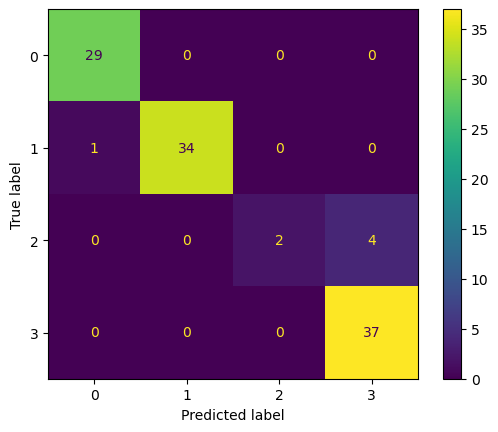

In [15]:
lgc_cm = confusion_matrix(Y_test['encoded_labels'], lgc_y_pred)

cm_display = ConfusionMatrixDisplay(lgc_cm).plot()

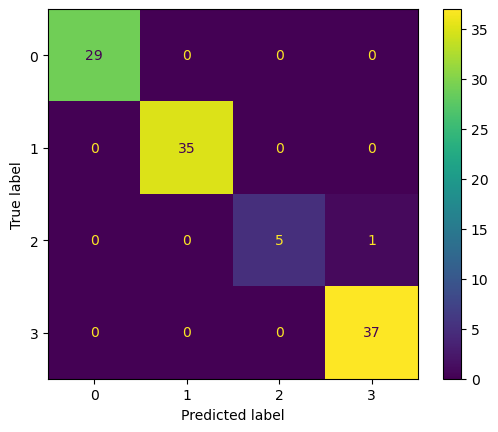

In [16]:
xgc_cm = confusion_matrix(Y_test['encoded_labels'], xgc_y_pred)

cm_display = ConfusionMatrixDisplay(xgc_cm).plot()

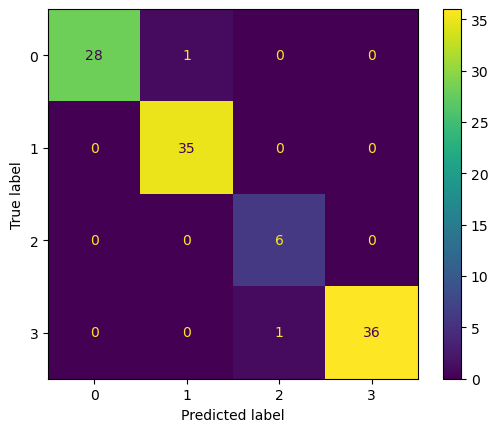

In [17]:
rfc_cm = confusion_matrix(Y_test['disease_type'], rfc_y_pred)

cm_display = ConfusionMatrixDisplay(rfc_cm).plot()

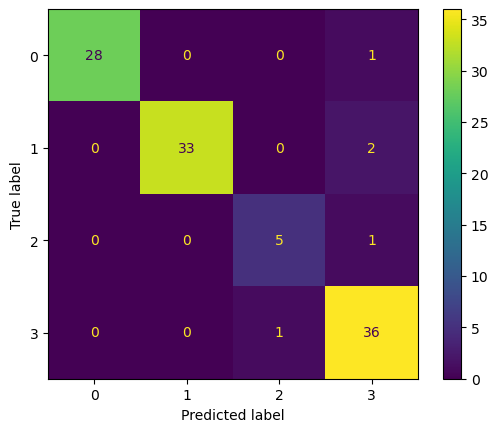

In [18]:
cbc_cm = confusion_matrix(Y_test['encoded_labels'], cbc_y_pred)

cm_display = ConfusionMatrixDisplay(cbc_cm).plot()

In [54]:
all_algo = [lgc_cm,xgc_cm,rfc_cm,cbc_cm]
algo_names= ["LightGBM","XGBoost","Random Forest","CatBoost"]

In [96]:
compare_algo={}
def specifity_and_sensivity(cm):
    column_sum=0
    spec_and_sens=0
    for i in range(len(cm)):
        for j in range(len(cm)):
            column_sum+=cm[j][i]
        spec_and_sens+=cm[i][i]/column_sum
        column_sum=0
    avg_spec_and_sens=spec_and_sens/4
    return avg_spec_and_sens
            

for i in range(len(all_algo)):
    avg = specifity_and_sensivity(all_algo[i])
    compare_algo[avg]=algo_names[i]
print(compare_algo)

{0.9672764227642277: 'LightGBM', 0.993421052631579: 'XGBoost', 0.9573412698412699: 'Random Forest', 0.9333333333333333: 'CatBoost'}


In [95]:
max_acc=0
for k,v in compare_algo.items():
    if k > max_acc:
        max_acc=k
best_tree = compare_algo[max_acc]
best_tree

'XGBoost'